# Rob's sandbox

---

# Imports

#### Python modules

In [65]:
import sys

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option("display.max_columns", 50)

import numpy as np

# Ancillary modules

#### Support adjustments

In [2]:
sys.path.append("../..")

#### Modules

In [3]:
%load_ext autoreload
%autoreload 2

from src.utils.data_dict import (
    data_dict
)

from src.utils.utils import (
    json_dump_dict,
    load_df
)

from src.utils.params import (
#     param_grid,
#     max_features,
#     n_estimators,
    evaluation_metric,
    feature_importance_theshold,
    tag_non_relevant_cats,
    ingestion_pickle_loc,
    transformation_pickle_loc,
    models_pickle_loc,
    X_train_pickle_loc,
    y_train_pickle_loc,
    X_test_pickle_loc,
    y_test_pickle_loc,
    test_predict_labs_pickle_loc,
    test_predict_scores_pickle_loc,
)

from src.pipelines.ingestion import (
    ingest
)

from src.pipelines.transformation import (
    load_ingestion,
#     date_transformation,
#     hour_transformation,
#     categoric_trasformation,
    transform
)

from src.pipelines.feature_engineering import (
    load_transformation,
    feature_generation,
    feature_selection,
    save_fe,
    feature_engineering,
    fe_pickle_loc_imp_features,
    fe_pickle_loc_feature_labs
)

---

# Original data

In [50]:
df_o = pd.read_csv("../../" + "data/incidentes-viales-c5.csv")
df_o

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383133,GA/201022/03443,22/10/2020,16:17:05,Jueves,(A) La unidad de atención a emergencias fue de...,22/10/2020,2020,Octubre,16:58:49,GUSTAVO A. MADERO,lesionado-atropellado,19.486310,-99.118120,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,GUSTAVO A. MADERO,"19.48631004,-99.11811996",10
1383134,GA/201022/03492,22/10/2020,16:29:13,Jueves,(A) La unidad de atención a emergencias fue de...,22/10/2020,2020,Octubre,18:54:22,VENUSTIANO CARRANZA,accidente-choque con lesionados,19.427274,-99.115814,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.427274,-99.115814",10
1383135,C5/201022/02030,22/10/2020,12:00:26,Jueves,(D) El incidente reportado se registró en dos ...,22/10/2020,2020,Octubre,12:02:30,AZCAPOTZALCO,accidente-choque sin lesionados,19.467180,-99.175250,EMERGENCIA,LLAMADA DEL 911,AZCAPOTZALCO,"19.46718,-99.17525016",10
1383136,C5/201022/02039,22/10/2020,12:01:25,Jueves,(D) El incidente reportado se registró en dos ...,22/10/2020,2020,Octubre,12:05:59,VENUSTIANO CARRANZA,accidente-choque con lesionados,19.427280,-99.096860,URGENCIAS MEDICAS,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.42728003,-99.09686016",10


# Tests

## Transformation

#### Loading ingestion pickle

In [51]:
df_ing = load_ingestion("../../" + ingestion_pickle_loc)

In [52]:
df_ing

,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,incidente_c4,tipo_entrada,label
folio,,,,,,,
GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,accidente-choque sin lesionados,BOTÓN DE AUXILIO,0.0
AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,accidente-choque con lesionados,BOTÓN DE AUXILIO,0.0
C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,accidente-choque sin lesionados,LLAMADA DEL 066,1.0
C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,accidente-choque sin lesionados,LLAMADA DEL 066,1.0
C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,accidente-choque sin lesionados,LLAMADA DEL 066,0.0
...,...,...,...,...,...,...,...
GA/201022/03443,22/10/2020,16:17:05,Jueves,(A) La unidad de atención a emergencias fue de...,lesionado-atropellado,BOTÓN DE AUXILIO,0.0
GA/201022/03492,22/10/2020,16:29:13,Jueves,(A) La unidad de atención a emergencias fue de...,accidente-choque con lesionados,BOTÓN DE AUXILIO,0.0
C5/201022/02030,22/10/2020,12:00:26,Jueves,(D) El incidente reportado se registró en dos ...,accidente-choque sin lesionados,LLAMADA DEL 911,0.0


In [55]:
df_ing["fecha_creacion_tm"] = pd.to_datetime(df_ing["fecha_creacion"])

In [60]:
df_ing["folio_"] = df_ing.index

In [61]:
df_ing.loc[:, ["fecha_creacion", "folio_"]].groupby("fecha_creacion").count()

,folio_
fecha_creacion,
01/01/2014,231
01/01/2015,220
01/01/2016,255
01/01/2017,357
01/01/2018,291
...,...
31/12/2015,410
31/12/2016,471
31/12/2017,418


In [59]:
20/550

0.03636363636363636

In [ ]:
df_ing["label"].value_counts(normalize=True)

## Feature engineering

#### Loading transformation pickles

In [ ]:
df_tra = load_transformation("../../" + transformation_pickle_loc)
df_tra

##### Exploring transfomation result

#### Processing data for model

In [ ]:
df_features_prc, df_labels, df_features_prc_cols = feature_generation(df)

In [ ]:
print(len(df_features_prc_cols))
df_features_prc_cols

In [ ]:
df_features_prc.shape

In [ ]:
print(len(enc_cat_features))
enc_cat_features

In [ ]:
df_features_prc.shape

In [ ]:
len(df_features_prc_cols)

#### Training, executing and evaluating model

In [ ]:
model = RandomForestClassifier(oob_score=True, n_jobs=-1)

In [ ]:
## Splitting data in train and test
X_train, X_test, y_train, y_test = train_test_split(df_features_prc, df_labels, test_size=0.3)

In [ ]:
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=2,
                           scoring=evaluation_metric,
                           return_train_score=True,
                           n_jobs=-1
                           )

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

print("\n++ Grid search results:\n")
print("    ++++ Best estimator: {}".format(grid_search.best_estimator_))
print("    ++++ Number of features in best estimator: {} \n".format(grid_search.best_estimator_.n_features_))
print("    ++++ Best estimator oob score: {}\n".format(grid_search.best_estimator_.oob_score_))

#### Identifying most important variables

##### Creating dataframe with ranks

##### Obtaining features cleaning dict from ranked features

In [ ]:
feature_importance.reset_index(inplace=True, drop=True)
feature_importance

In [ ]:
feature_importance["Important"] = feature_importance["Importance"].apply(lambda x: True if x >= feature_importance_theshold else False)

In [ ]:
def find_mother(row, ohe_dict):
    """
    """
    
    for key in ohe_dict:
        if row in ohe_dict[key]:
            return key
    
    return row

In [ ]:
feature_importance["Mother_feature"] = feature_importance["Feature"].apply(lambda x: find_mother(x, ohe_dict))

In [ ]:
feature_importance

In [ ]:
def feature_cleaning_dict(feature_importance, ohe_dict):
    
    m1 = feature_importance["Important"] == True
    important_features = list(feature_importance.loc[m1, "Mother_feature"].unique())

    fe_cln_dict = {}

    for imp_f in important_features:

        m2 = feature_importance["Mother_feature"] == imp_f

        if imp_f in ohe_dict:
            fe_cln_dict[imp_f] = {
                "data_type": "categoric",
                "important_categories": list(feature_importance.loc[(m1 & m2), "Feature"])
            }
        else:
            fe_cln_dict[imp_f] = {
                "data_type": "non-categoric",
            }

#     json_dump_dict(fe_cln_dict)
    
    return fe_cln_dict

In [ ]:
fe_cln_dict = feature_cleaning_dict(feature_importance, ohe_dict)
fe_cln_dict

##### Cleaning transformation dataframe based on features cleaning dict

In [ ]:
df_tra

In [ ]:
nr_f = [col for col in df_tra.columns if col not in fe_cln_dict]
df_tra.drop(nr_f, axis=1, inplace=True)

In [ ]:
df_tra

In [ ]:
for cat_key in [key for key in fe_cln_dict if fe_cln_dict[key]["data_type"] == "categoric"]:
    m1 = ~df_tra[cat_key].isin(fe_cln_dict[cat_key]["important_categories"])
    df_tra.loc[m1, cat_key] = tag_non_relevant_cats

In [ ]:
df_tra

#### Reviewing results

In [ ]:
df_imp_features_prc = load_df("../../" + fe_pickle_loc_imp_features)
df_labels = load_df("../../" + fe_pickle_loc_feature_labs)

In [ ]:
print(df_imp_features_prc.shape)
df_imp_features_prc.toarray()

In [ ]:
print(df_labels.shape)
df_labels

## Modeling (magic loop)

### Imports and reviewing results

In [4]:
best_model = load_df("../../" + models_pickle_loc)
X_train = load_df("../../" + X_train_pickle_loc)
y_train = load_df("../../" + y_train_pickle_loc)
X_test = load_df("../../" + X_test_pickle_loc)
y_test = load_df("../../" + y_test_pickle_loc)
test_predict_labs = load_df("../../" + test_predict_labs_pickle_loc)
test_predict_scores = load_df("../../" + test_predict_scores_pickle_loc)

In [70]:
best_model.

TypeError: predict_proba() missing 1 required positional argument: 'X'

In [6]:
print(X_train.shape)
X_train.toarray()

(968196, 22)


array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.34585266,  1.38026149],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.8966045 , -0.5963419 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.65748251, -0.89602004],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.04692287, -0.2473593 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.7959287 , -1.2705245 ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.01704798,  1.52481481]])

In [7]:
print(y_train.shape)
print(y_train.value_counts(normalize=True))
y_train

(968196,)
0.0    0.795937
1.0    0.204063
Name: label, dtype: float64


folio
C5/200205/08118    1.0
C5/180607/06491    0.0
C5/170109/03204    0.0
C5/170530/03787    0.0
C5/190412/07564    0.0
                  ... 
C5/190105/02070    0.0
C4/160114/04450    1.0
C5/190202/07087    0.0
C5/160908/02000    1.0
C5/201010/08534    0.0
Name: label, Length: 968196, dtype: float64

In [8]:
print(X_test.shape)
X_test.toarray()

(414942, 22)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.8966045 ,  0.85063221],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.40648834, -1.31982895],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.91117035,  0.12714516],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.65748251, -0.89602004],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.65748251,  1.15031035],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.04692287, -0.2473593 ]])

In [9]:
print(y_test.shape)
print(y_test.value_counts(normalize=True))
y_test

(414942,)
0.0    0.795803
1.0    0.204197
Name: label, dtype: float64


folio
C5/190613/06795    0.0
C4/150322/02894    0.0
C5/180302/01135    0.0
C5/190411/07684    0.0
C5/170212/06529    0.0
                  ... 
C4/140505/00861    0.0
C5/190118/07088    0.0
C5/200814/04440    0.0
C5/170218/07803    0.0
AO/190428/07143    0.0
Name: label, Length: 414942, dtype: float64

In [10]:
print(test_predict_labs.shape)
print("Suma: ", sum(test_predict_labs))
test_predict_labs

(414942,)
Suma:  0.0


array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
print(test_predict_scores.shape)
test_predict_scores

(414942, 2)


array([[0.85048844, 0.14951156],
       [0.71819398, 0.28180602],
       [0.70263902, 0.29736098],
       ...,
       [0.70665025, 0.29334975],
       [0.85405584, 0.14594416],
       [0.9267244 , 0.0732756 ]])

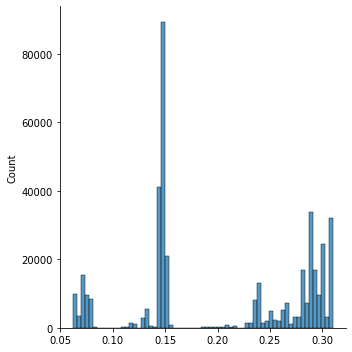

In [12]:
sns.displot(
    test_predict_scores[:, 1], 
)

<AxesSubplot:xlabel='label', ylabel='1_prob'>

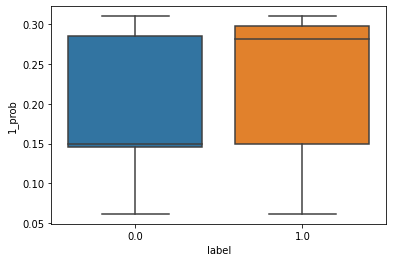

In [15]:
sns.boxplot(
    x=dfx["label"],
    y=dfx["1_prob"]
)

<AxesSubplot:xlabel='1_prob', ylabel='Density'>

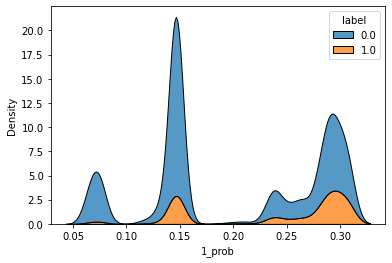

In [16]:
sns.kdeplot(
    data=dfx.loc[:, ["label", "1_prob"]],
    x="1_prob",
    hue="label",
    multiple="stack"
)

### Fixing labels with predict scores

In [14]:
dfx = pd.DataFrame(y_test)
dfx["1_prob"] = test_predict_scores[:, 1]
dfx["prob_label"] = dfx["1_prob"].apply(lambda x: 1 if x >= 0.18 else 0)
dfx["correct"] = dfx.apply(lambda x: True if x["label"] == x["prob_label"] else False, axis=1)
dfx

,label,1_prob,prob_label,correct
folio,,,,
C5/190613/06795,0.0,0.149512,0,True
C4/150322/02894,0.0,0.281806,1,False
C5/180302/01135,0.0,0.297361,1,False
C5/190411/07684,0.0,0.146666,0,True
C5/170212/06529,0.0,0.309855,1,False
...,...,...,...,...
C4/140505/00861,0.0,0.133383,0,True
C5/190118/07088,0.0,0.146666,0,True
C5/200814/04440,0.0,0.293350,1,False


In [17]:
dfx["correct"].value_counts(normalize=True)

True     0.58726
False    0.41274
Name: correct, dtype: float64

In [18]:
confusion_matrix(dfx["label"], dfx["prob_label"])

array([[185059, 145153],
       [ 26110,  58620]])

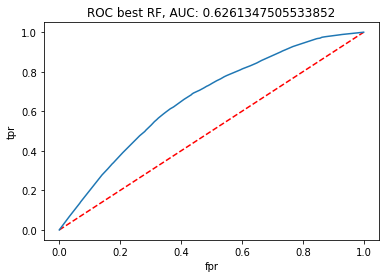

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, test_predict_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, dfx["prob_label"].values)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [32]:
accuracy_score(y_test, dfx["prob_label"].values)

0.5872603881988326

In [67]:
recall_score(y_test, dfx["prob_label"].values)

0.6918446831110586

In [33]:
accuracy_score(y_test, test_predict_labs)

0.795802786895518

In [66]:
recall_score(y_test, test_predict_labs)

0.0

In [39]:
precision, recall, thresholds_2 = precision_recall_curve(y_test, test_predict_scores[:,1], pos_label=1)
thresholds_2 = np.append(thresholds_2, 1)

In [48]:
thresholds_2

array([0.06178877, 0.06237191, 0.06245233, 0.06249023, 0.06255245,
       0.06257064, 0.06275003, 0.06304369, 0.0630946 , 0.06321291,
       0.06325391, 0.06338916, 0.0636642 , 0.06378251, 0.06392651,
       0.06397875, 0.06409707, 0.06413532, 0.0641643 , 0.06416989,
       0.06420001, 0.06420114, 0.0642233 , 0.06429083, 0.06431833,
       0.06432508, 0.06440307, 0.06440914, 0.06458129, 0.06459586,
       0.0646847 , 0.06470781, 0.06471417, 0.06473695, 0.06476208,
       0.06482613, 0.06485862, 0.06498514, 0.06505404, 0.06510346,
       0.06511712, 0.06535199, 0.06539998, 0.06552651, 0.06564483,
       0.06581176, 0.06581568, 0.06583297, 0.0658388 , 0.0658626 ,
       0.06596612, 0.06622874, 0.06624345, 0.06627958, 0.06635149,
       0.06642541, 0.06650607, 0.06653711, 0.06655193, 0.06655691,
       0.06667025, 0.06704744, 0.06709828, 0.06726064, 0.06777225,
       0.06802644, 0.06807286, 0.0681237 , 0.06837329, 0.06870259,
       0.06906984, 0.06917496, 0.06931851, 0.06934251, 0.06945

In [40]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [41]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.061789,0.204230,1.000000,0.339187,1.000000,0.999800,0.000200,0.000000
1,0.062372,0.204316,0.999953,0.339303,0.999953,0.999225,0.000775,0.000047
2,0.062452,0.204323,0.999941,0.339313,0.999941,0.999167,0.000833,0.000059
3,0.062490,0.204425,0.999823,0.339447,0.999823,0.998422,0.001578,0.000177
4,0.062552,0.204458,0.999799,0.339490,0.999799,0.998198,0.001802,0.000201
...,...,...,...,...,...,...,...,...
935,0.303305,0.341528,0.142323,0.200918,0.142323,0.070409,0.929591,0.857677
936,0.305946,0.340072,0.135607,0.193896,0.135607,0.067523,0.932477,0.864393
937,0.306196,0.339078,0.128172,0.186026,0.128172,0.064104,0.935896,0.871828
938,0.308563,0.345293,0.066671,0.111762,0.066671,0.032437,0.967563,0.933329


In [43]:
li = 0.17
ls = 0.19
m1 = (metrics_report["threshold"] > li) & (metrics_report["threshold"] < ls)
metrics_report.loc[m1, :]

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
679,0.170365,0.287602,0.691915,0.406315,0.691915,0.439772,0.560228,0.308085
680,0.170615,0.287607,0.691915,0.406319,0.691915,0.439763,0.560237,0.308085
681,0.174070,0.287626,0.691904,0.406336,0.691904,0.439714,0.560286,0.308096
682,0.175823,0.287627,0.691904,0.406338,0.691904,0.439711,0.560289,0.308096
683,0.176524,0.287657,0.691904,0.406367,0.691904,0.439648,0.560352,0.308096
684,0.177163,0.287657,0.691880,0.406363,0.691880,0.439633,0.560367,0.308120
685,0.177865,0.287662,0.691868,0.406366,0.691868,0.439615,0.560385,0.308132
686,0.178834,0.287658,0.691856,0.406361,0.691856,0.439615,0.560385,0.308144
687,0.180174,0.287673,0.691845,0.406374,0.691845,0.439575,0.560425,0.308155
688,0.180923,0.287674,0.691833,0.406372,0.691833,0.439566,0.560434,0.308167


# *Notes*

## Finding labels of processed matrix

#### Manually number of labels that should be in the model.

In [ ]:
cat_list = list(df_tra["dia_semana"].unique()) + \
            list(df_tra["incidente_c4"].unique()) + \
            list(df_tra["tipo_entrada"].unique()) + \
            list(df_tra["anio_inicio"].unique())

In [ ]:
print(len(cat_list))
cat_list

#### Example code from StackOverflow to get labels.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

train = pd.DataFrame({'age': [23,12, 12, np.nan],
                      'Gender': ['M','F', np.nan, 'F'],
                      'income': ['high','low','low','medium'],
                      'sales': [10000, 100020, 110000, 100],
                      'foo' : [1,0,0,1],
                      'text': ['I will test this',
                               'need to write more sentence',
                               'want to keep it simple',
                               'hope you got that these sentences are junk'],
                      'y': [0,1,1,1]})
numeric_columns = ['age']
cat_columns     = ['Gender','income']

numeric_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline     = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
text_pipeline = make_pipeline(CountVectorizer(), SelectKBest(k=5))

transformers = [
('num', numeric_pipeline, numeric_columns),
('cat', cat_pipeline, cat_columns),
('text', text_pipeline, 'text'),
('simple_transformer', MinMaxScaler(), ['sales']),
]

combined_pipe = ColumnTransformer(transformers, remainder='passthrough')

transformed_data = combined_pipe.fit_transform(train.drop('y',1), train['y'])

In [ ]:
train

In [ ]:
transformed_data.shape

In [ ]:
def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features




pd.DataFrame(transformed_data, 
             columns=get_ct_feature_names(combined_pipe))

In [ ]:
train

## Updating dictionary

In [ ]:
x_dict = {}

In [ ]:
var = "var_1"

In [ ]:
def create_datadict_entry(var, relevant=True, data_type="not_specified", model_relevant="False"):
    
    entry = {
        var: {
            "relevant": relevant,
            "data_type": data_type,
            "model_relevant": model_relevant
        }
    }
    
    x_dict.update(entry)
    
    return

In [ ]:
create_datadict_entry(var)

In [ ]:
x_dict

---
---